# Libraries

In [77]:
# Import Libraries
from textblob import TextBlob
import pandas as pd
import datetime
#pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

# Import Data

In [78]:
df = pd.read_csv('#HouseOfTheDragon langen -is retweet 20220926 06PM.csv', index_col=0)
df.head()

,tweet,time,id,likes,location
0,Why is everyone giving birth this episode the surround sound has my house sounding like a damn labour unit #HouseOfTheDragon,2022-09-26 22:30:08+00:00,1342791749635334146,0,NaN
1,There is something deeply unsettling about the #HouseOfTheDragon opening credits. Its seriously just rivers of blood flowing from the top of a stone castle(temple) like some mayan blood sacrifice shit. Also weird to know 10s of millions of americans are watching this,2022-09-26 22:30:01+00:00,388005079,0,NaN
2,"#HouseOfTheDragon the women take centre stage and they are amazing, in all their scheming yet vulnerable glory.",2022-09-26 22:30:01+00:00,456040349,0,NaN
3,Girl that is yo Uncle #HouseOfTheDragon https://t.co/jC5ruVU2Xy,2022-09-26 22:29:58+00:00,58581073,0,NaN
4,ONE ARM????😭 howww #KingViserys #Laenor #RhaenyraTargaryen #HouseOfTheDragon #HouseTargaryen https://t.co/94lMppbcFn,2022-09-26 22:29:50+00:00,1213538507689361408,0,NaN


In [79]:
df.shape

(10000, 5)

#### Clean up columns

In [80]:
df.dropna(subset=['tweet'])
df=df.drop(columns=['id','time','location'])
df.head()

,tweet,likes
0,Why is everyone giving birth this episode the surround sound has my house sounding like a damn labour unit #HouseOfTheDragon,0
1,There is something deeply unsettling about the #HouseOfTheDragon opening credits. Its seriously just rivers of blood flowing from the top of a stone castle(temple) like some mayan blood sacrifice shit. Also weird to know 10s of millions of americans are watching this,0
2,"#HouseOfTheDragon the women take centre stage and they are amazing, in all their scheming yet vulnerable glory.",0
3,Girl that is yo Uncle #HouseOfTheDragon https://t.co/jC5ruVU2Xy,0
4,ONE ARM????😭 howww #KingViserys #Laenor #RhaenyraTargaryen #HouseOfTheDragon #HouseTargaryen https://t.co/94lMppbcFn,0


# Sentiment Analysis

In [81]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

In [82]:

#vars
noOfTweet = len(df)
positive  = 0
negative = 0
neutral = 0
polarity = 0
sentiment=[]
subjectivity=[]

#iterate and calculate polarity
for index,row in df.iterrows():
    analysis = TextBlob(row['tweet'])
    polarity += analysis.sentiment.polarity

    #Collecting Sentiment Tally
    flag = random.randint(1,200)
    if flag ==1:
        print('brreak'.center(50,'-'))
        print(polarity)
        print(analysis.sentiment)
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
        #print(analysis)
    
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
        #print(analysis)
    
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
        #print(analysis)

    #Adding Sentiment to List
    sentiment.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
#calculating stats
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

print("How people are reacting on #HouseOfTheDragon by analyzing " + str(noOfTweet) + " Tweets.")
df['sentimentTB'] = sentiment
df['subjectivityTB'] = subjectivity
df.head()

----------------------brreak----------------------
2.7407431457431444
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
----------------------brreak----------------------
25.494687462999952
Sentiment(polarity=0.03409090909090909, subjectivity=0.1553030303030303)
----------------------brreak----------------------
26.008298574111063
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------brreak----------------------
73.33858198478414
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------brreak----------------------
88.0076711803109
Sentiment(polarity=0.5588541666666667, subjectivity=0.6222222222222222)
----------------------brreak----------------------
90.80166802186633
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------brreak----------------------
97.59874594394427
Sentiment(polarity=0.5, subjectivity=0.5)
----------------------brreak----------------------
125.28531948387136
Sentiment(polarity=0.2, subjectivity=0.2)
----------------

,tweet,likes,sentimentTB,subjectivityTB
0,Why is everyone giving birth this episode the surround sound has my house sounding like a damn labour unit #HouseOfTheDragon,0,0.400000,0.400000
1,There is something deeply unsettling about the #HouseOfTheDragon opening credits. Its seriously just rivers of blood flowing from the top of a stone castle(temple) like some mayan blood sacrifice shit. Also weird to know 10s of millions of americans are watching this,0,-0.206667,0.733333
2,"#HouseOfTheDragon the women take centre stage and they are amazing, in all their scheming yet vulnerable glory.",0,0.050000,0.700000
3,Girl that is yo Uncle #HouseOfTheDragon https://t.co/jC5ruVU2Xy,0,0.000000,0.000000
4,ONE ARM????😭 howww #KingViserys #Laenor #RhaenyraTargaryen #HouseOfTheDragon #HouseTargaryen https://t.co/94lMppbcFn,0,0.000000,0.000000


# Word Cloud

In [83]:
import random
#Variables
counter = 0
testdf= df.copy()
runs = testdf.shape[0]
clean_tweets=[]
keywords=['houseofthedragon','hotd','hbo','http','https','episode','ive','fuck','houseofthedragonhbo','gameofthrones']

#Initialize functions
spell = Speller('en') #Spell checker, set to english
stopword = stopwords.words('english') #stopwords, set to english
wordnet_lemmatizer = WordNetLemmatizer() #lemmatizer

#Cleaning the rows for a more consistent word cloud output
for index,row in testdf.iterrows():
    #print(row)
    roll = random.randint(0,500)
    if roll == 69:
        print('Still working...')
    #Removing Punctuation
    output = ''.join(c for c in row['tweet'] if c not in punctuation)
    clean_tweets.append(str(output.lower()))
    #Removing Numbers
    output = ''.join(c for c in clean_tweets[counter] if not c.isnumeric())
    clean_tweets[counter]= str(output)
    #Spellchecking
    #correct_spell = [spell(w) for w in (nltk.word_tokenize(clean_tweets[counter]))]
    #clean_tweets[counter]= " ".join(correct_spell)
    #print(correct_spell)
    #print(clean_tweets[counter])
    #Lemmatizing Words
    lemmatize = False #change if you want to lemmatize
    if lemmatize:
        word_tokens = nltk.word_tokenize(row['tweet'])
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
        row['tweet']= " ".join(lemmatized_word) 

    #Removing Stopwords
    text = clean_tweets[counter]
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words() and word.lower() not in keywords and 'http' not in word.lower()] #not in stopwords.words('english') and twts.lower() not in keywords and len(twts)>2 and '`' not in twts])
    new_text = " ".join(tokens_without_sw)
    #print(f'{new_text}'.center(50,'-'))
    clean_tweets[counter] = new_text
    #print(row['tweet'])         
    #print('tweet'.center(50,'-'))


    #Keep Track of Progress
    counter += 1
    #Update User
    if counter % 100 == 0:
        print(counter, 'of', runs, 'completed')
        #print(row['tweet'])         
        #print('tweet'.center(50,'-'))
        #Save in case of crashes
        if counter %1000 == 0:
            temp_df = testdf[counter-1000:counter]
            temp_df.to_csv(f'Cleaned tweets #{counter/1000}.csv')
            print('Saved file',f'Cleaned tweets #{counter/1000}.csv')

#print('\n', clean_tweets)

Still working...
Still working...
100 of 10000 completed
200 of 10000 completed
300 of 10000 completed
400 of 10000 completed
500 of 10000 completed
600 of 10000 completed
700 of 10000 completed
800 of 10000 completed
900 of 10000 completed
1000 of 10000 completed
Saved file Cleaned tweets #0.1.csv
1100 of 10000 completed
1200 of 10000 completed
1300 of 10000 completed
1400 of 10000 completed
1500 of 10000 completed
1600 of 10000 completed
1700 of 10000 completed
1800 of 10000 completed
1900 of 10000 completed
Still working...
2000 of 10000 completed
Saved file Cleaned tweets #0.2.csv
2100 of 10000 completed
2200 of 10000 completed
2300 of 10000 completed
2400 of 10000 completed
2500 of 10000 completed
2600 of 10000 completed
2700 of 10000 completed
2800 of 10000 completed
2900 of 10000 completed
3000 of 10000 completed
Saved file Cleaned tweets #0.3.csv
Still working...
3100 of 10000 completed
3200 of 10000 completed
3300 of 10000 completed
3400 of 10000 completed
3500 of 10000 comple

In [ ]:
#Save the file
testdf.to_csv('Cleaned HOTD Tweets.csv')
#testdf.drop(columns=['id','time','location'], inplace=True)
testdf['clean'] = clean_tweets
#testdf.drop(columns=['tweet'], inplace=True)
testdf.head()

In [85]:
testdf.shape

(10000, 5)

# Polarity Pie Chart

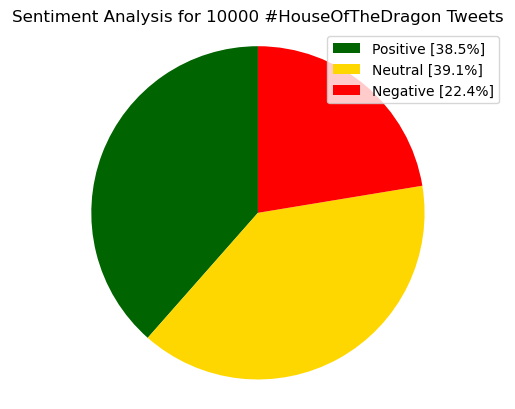

In [99]:
#Creating PieCart
#vars and settings
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['darkgreen', 'gold','red']
keyword = '#HouseOfTheDragon'
patches, texts = plt.pie(sizes,colors=colors, startangle=90)

#plt settings and output
plt.style.use('default')
plt.legend(patches, labels, loc='best')
plt.title("Sentiment Analysis for 10000 "+keyword+" Tweets" )
plt.axis('equal')
plt.show()

# Word Cloud

In [89]:
import datetime
#date time time
now = datetime.datetime.now()
now.strftime("%Y-%m-%d %H:%M")


'2022-09-29 19:53'

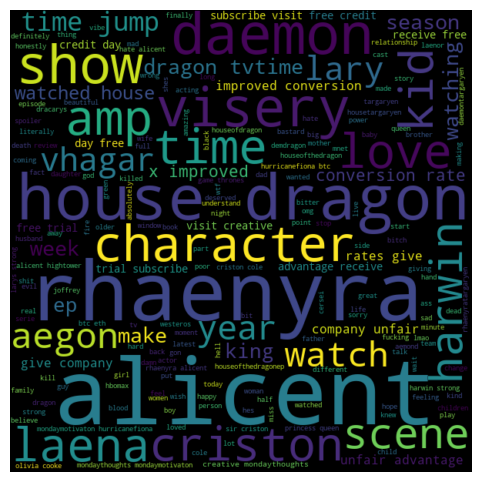

In [100]:
#extract all words from cleaned tweets
allwords= ""
allwords = ' '.join([twts for twts in testdf['clean']])
wordCloud = WordCloud(width=600, height=600, random_state=21, max_font_size=119).generate(allwords)
#Plotting the wordcloud
plt.figure(figsize=(6, 6))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()